# ENFRIAMIENTO SIMULADO


El **enfriamiento simulado** es un algoritmo de optimización que busca encontrar la solución óptima a un problema mediante la exploración de un espacio de soluciones. En lugar de buscar exhaustivamente todas las posibles soluciones, el enfriamiento simulado comienza con una solución aleatoria y permite que ésta evolucione mediante cambios aleatorios y aceptando soluciones subóptimas en función de una probabilidad determinada por una temperatura ficticia. A medida que el algoritmo avanza, la temperatura disminuye gradualmente y la probabilidad de aceptar soluciones subóptimas disminuye, lo que lleva a que el algoritmo converja hacia una solución óptima. El enfriamiento simulado es especialmente útil para problemas de optimización combinatoria, como el problema del viajante o el problema de asignación cuadrática, y ha demostrado ser muy eficaz para encontrar soluciones aproximadas en un tiempo razonable.

<br/>
<br/>

**Pseudocódigo enfriamiento simulado**
<br/>


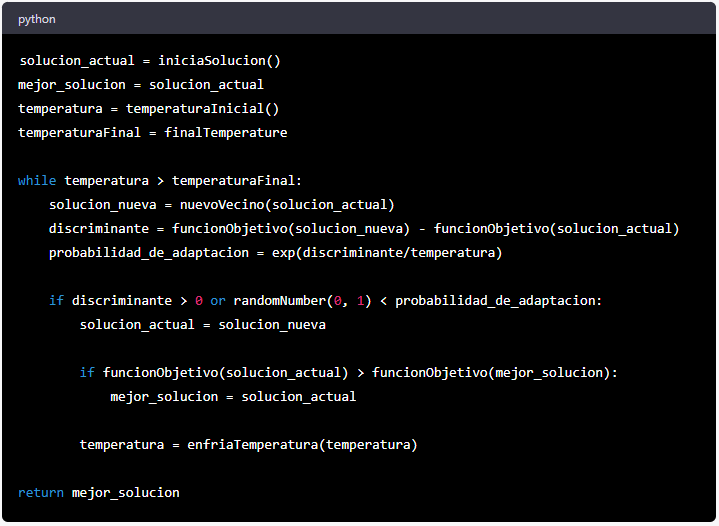

<br/>

A continuación programaremos un ejemplo en python sobre el enfriamiento simulado.

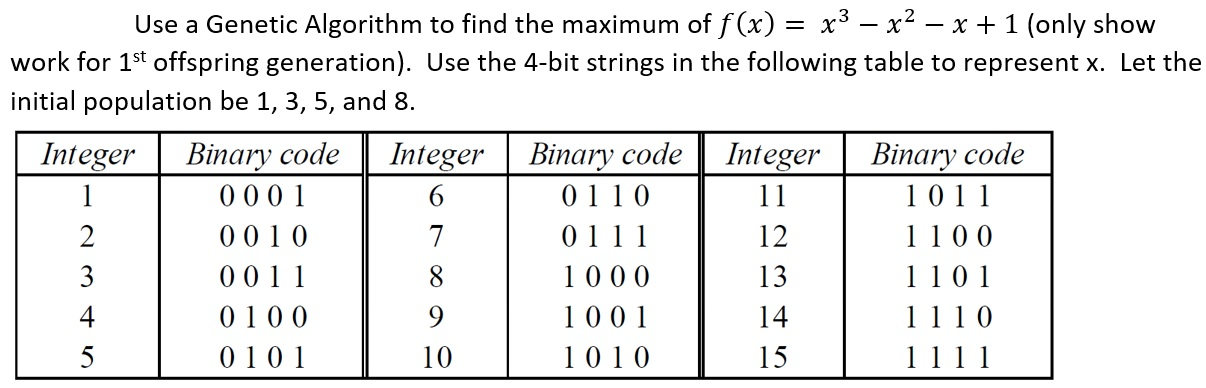

In [40]:
#Importamos las librerías

import math
import random
import numpy as np

Para las representaciones de los números usaremos un vector binario.
<br/>
Usaremos una función para pasar de vector binario a entero.

In [41]:
def binary_to_decimal(binary_list):
    decimal = 0
    for i in range(len(binary_list)):
        decimal += binary_list[i] * 2**(len(binary_list) - i - 1)
    return decimal

Creamos una función para resolver la ecuación.

In [42]:
def equation(x):
  return math.pow(x,3) - math.pow(x,2) - x + 1

Creamos la función objetivo completa.

In [43]:
def fitness(arr):
  aux = binary_to_decimal(arr)
  return equation(aux)

Por último creamos una función que mute el vector binario, cambiando aleatoriamente el estado de una de las posiciones.

In [44]:
def mutate(binary_list):
    index_to_flip = random.randint(0, len(binary_list) - 1)
    binary_list[index_to_flip] = 1 - binary_list[index_to_flip]
    return binary_list

Creamos el enfriamiento simulado:

In [92]:
def sa(solucion_inicial, temperatura = 100):

  #Guardamos en la mejor solucion la solucion inicial
  solucion_actual = solucion_inicial
  mejor_solucion = solucion_actual
  cont = 1

  #Mientras no se cumpla la condición de parada
  while temperatura > 0.0001:
    print("["+str(cont)+"] - "+str(mejor_solucion))
    #Generamos una nueva solucion
    solucion_nueva = mutate(np.array(solucion_actual))
    
    #Comprobamos cual de las soluciones es mayor
    discriminante = fitness(solucion_nueva) - fitness(solucion_actual)

    #Calculamos la probabilidad de aceptacion
    problabilidad_de_adaptacion = np.exp(discriminante / temperatura)

    #Si la solucion nueva es mejor o aleatoriamente se cumple la aceptacion
    if discriminante > 0 or random.random() < problabilidad_de_adaptacion:

      #Actualizamos la solucion actual
      solucion_actual = np.array(solucion_nueva)

      #Si mejora la solucion actulizamos la mejor
      if fitness(solucion_actual) > fitness(mejor_solucion):
        mejor_solucion = np.array(solucion_actual)

    #Enfriamos la temperatura
    temperatura2 = temperatura * 0.9
    temperatura = int(temperatura - (temperatura - temperatura2))
    cont = cont + 1
  return mejor_solucion

Ejecutamos el algoritmo

In [107]:
t = 100
solucion_inicial = np.array([0,0,0,0,0,0,0,0,0,0,0,0])

res = sa(solucion_inicial, t)
print(str(res))
print("Fitness: " + str(fitness(res)))

[1] - [0 0 0 0 0 0 0 0 0 0 0 0]
[2] - [0 0 0 0 0 0 0 0 1 0 0 0]
[3] - [0 0 0 0 0 0 0 0 1 0 0 0]
[4] - [0 0 1 0 0 0 0 0 1 0 0 0]
[5] - [0 0 1 0 0 0 0 0 1 0 0 0]
[6] - [0 1 1 0 0 0 0 0 1 0 0 0]
[7] - [0 1 1 0 0 0 0 1 1 0 0 0]
[8] - [0 1 1 0 0 0 0 1 1 0 0 0]
[9] - [0 1 1 0 0 0 0 1 1 1 0 0]
[10] - [0 1 1 0 0 0 1 1 1 1 0 0]
[11] - [0 1 1 0 0 0 1 1 1 1 0 0]
[12] - [0 1 1 0 0 0 1 1 1 1 1 0]
[13] - [0 1 1 0 0 0 1 1 1 1 1 0]
[14] - [0 1 1 0 1 0 1 1 1 1 1 0]
[15] - [0 1 1 0 1 0 1 1 1 1 1 0]
[16] - [0 1 1 0 1 0 1 1 1 1 1 0]
[17] - [0 1 1 0 1 1 1 1 1 1 1 0]
[18] - [0 1 1 0 1 1 1 1 1 1 1 0]
[19] - [0 1 1 0 1 1 1 1 1 1 1 0]
[20] - [0 1 1 0 1 1 1 1 1 1 1 0]
[21] - [0 1 1 0 1 1 1 1 1 1 1 0]
[22] - [0 1 1 0 1 1 1 1 1 1 1 1]
[23] - [0 1 1 0 1 1 1 1 1 1 1 1]
[24] - [0 1 1 0 1 1 1 1 1 1 1 1]
[25] - [0 1 1 1 1 1 1 1 1 1 1 1]
[26] - [1 1 1 1 1 1 1 1 1 1 1 1]
[27] - [1 1 1 1 1 1 1 1 1 1 1 1]
[28] - [1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1]
Fitness: 68652384256.0


<ipython-input-92-e18d93fe14e6>:18: RuntimeWarning: overflow encountered in exp
  problabilidad_de_adaptacion = np.exp(discriminante / temperatura)
